# IIIT ASSIGNMENT 
# HEART DATASET (KNN,SVM,DECISION TREE CLASSIFIER), (05.06.25)
# BY PARTH MISHRA

# OBJECTIVE:- Perform KNN, SVM and Decision Tree classifier to predict the heart disease based on the attached dataset. Also perform comparative study among the models.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel(r'C:/Users/parth/OneDrive/Desktop/pandas/heart.xlsx')
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset shape: (1025, 14)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values in

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', C=1.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

results = {} 

In [14]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        'accuracy': acc,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


KNN Results:
Accuracy: 0.8341
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


SVM Results:
Accuracy: 0.8878
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205


Decision Tree Results:
Accuracy: 0.8439
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accura

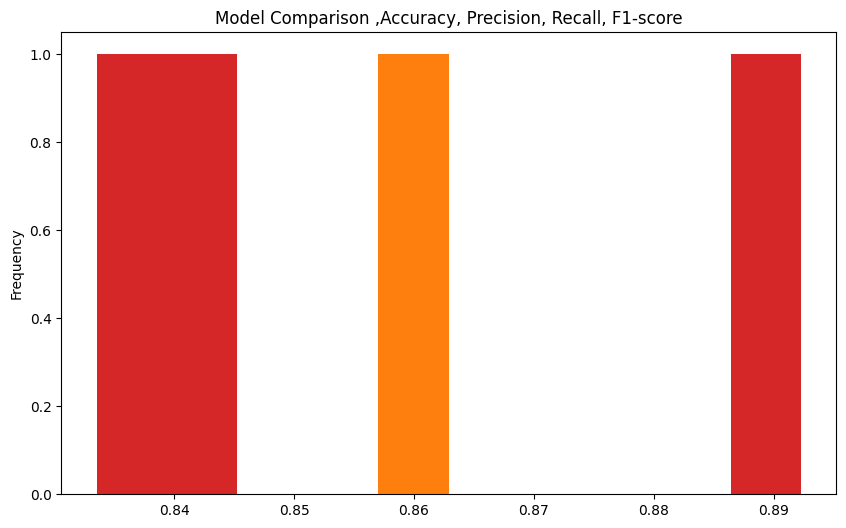

In [19]:
metrics_df = pd.DataFrame(results).T  
metrics_df.plot(kind='hist', figsize=(10, 6),legend=False)
plt.title("Model Comparison ,Accuracy, Precision, Recall, F1-score")
plt.show()